# Exploratory data analysis


In [1]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

### topic

- EDA가 무엇? 왜 중요?

- EDA 과정에서 무엇이 중요한지

- 어떤 tools

- data cleaning

- 캐글 예제

### EDA가 무엇? 

- data를 살펴보면서 "잘 이해하고, 익숙해 지는 것"

- data에 대한 직관 만들기

- feature에 대한 가설 수립 => better score

- 재밌는 insight 발견 => better score

#### Visualization

- 시각화를 하면 즉시 어떤 패턴을 볼 수 있음 => 저 패턴은 뭐지? => 이 패턴을 model에 어떻게 써먹을 수 있을까?

- 어떤 가설을 세웠을 때, 시각화를 통해 test할 수 있음

## Building intuition about the data

### EDA step

- domain 지식 얻기

- 데이터가 직관적인지 체크

- 데이터가 어떻게 생성되었는지 이해

#### domain 지식 얻기

- competition 의 분야가 다양하기 때문에 아주 자세하게는 domain에 대해 알 필요는 없지만

    1. 우리의 목적
    2. 우리가 가진 데이터
    3. 사람들이 보통 어떻게 문제를 해결하는지 
    
정도는 알아야함. 구글링 위키피디아 등등 에서 search

#### 데이터가 직관적인지 체크

- 데이터에 있는 값들이 말이 되는지(말도 안되게 튀는 값), domain 관점에서 봤을 때 말이 되는지.
    > (e.g.) Age 컬럼이 있는데 값이 300 => 걍 손으로 바꿔도 됨 ㅋ

- 이해가 잘 안되면 forum에 질문 고고

- 휴먼에러로 생긴 데이터 오류 말고, logic이나 알고리즘이 이상해서 나오는 반복적인 오류 => feature generation 가능(is_incorrect 같은)

#### 데이터가 어떻게 생성되었는지 이해

- 어떤 방식으로 sampling되었는지 => 바탕으로 validation set 만들기
> train/test set이 각각 다른 알고리즘으로 생성되었다 => train set을 validation set으로 이용할 수 없음.
> 
> 왜냐면 그 validation set이 test set 을 대표할 수 없기 때문

- train/test가 다르게 sampling 된것을 아는 방법
> plot 그려보면 매우 다르다
> 
> train의 period가 test period보다 몇배는 큰데, row 개수는 test가 더 많을 때 => 먼가 이상하다고 봐야함

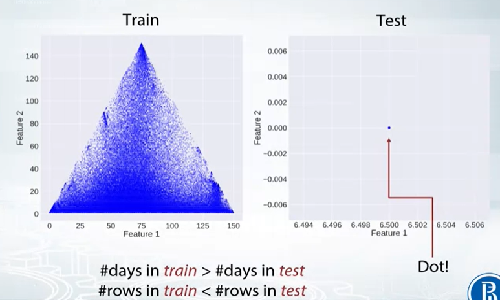

In [2]:
image = Image.open('img1.png')
image.resize((500,300))

## Exploring anonymized data

1. anonymized data란?

2. 우리가 뭘 할 수 있는가?

#### Anonymized data 란
- feature 이름에 아무 의미가 없음
- text 는 hash되어있음
---
#### 우리가 뭘 할 수 있는 가
- 개별 feature 알아보기
    - column의 의미를 추측 (이거는 어려울 때가 많음)
    - column의 타입을 추측 (그럴 땐 이거라도)

---
(시각화때 다룸)
- feature간의 관계를 알아보는 것
    - feature pair의 관계 찾기
    - feature group 찾기


### 강의에서는 코드를 치면서 보여줬기 때문에 process를 말로 설명함.

1. random Forest를 쓸 수 있게, fillna(-999), label encoding with factorize 등등 preprocessing 진행
2. 바로 random Forest 돌려서 feature importance 확인. 가장 높은 몇가지를 집중적으로 파보자
3. 가장 높은 몇가지 변수의 mean, std 확인 => standard scaled 되었음 => 한번 다시 scaled back 해보자
4. 변수의 unique 값을 구하고, np.sort한다음에 np.diff 하여 각 값들의 차이를 본다
5. 0.4332159로 다 나눠주면
6. 수상하게도 소수점 뒷자리가 다 똑같다. 그것을 다 빼주면 비로소 제대로된 값이 나온다
7. 그리고 value_counts 해보면 1968 이라는 값이 나오는데 이걸 보고서 year of birth 라는 변수로 추측할 수 있고
8. type을 datetime으로 알 수 잇음

#### 이런 식으로 feature를 조사해는 것에 대한 현실적인 생각
feature가 많으면 이걸 하나하나 다해봐? 
    
    변수 type정도만이라도 추측해내면 아주 유용하다
> 유용한 함수들
>
> df.dtypes => float(as numeric), integer(as binary encoded, event counter, categorical feature with label encoder), object
> 
> df.info()
> 
> x.value_counts()
> 
> x.isnull()

## Visualizations

개별 feature를 explore하는것, feature pair를 explore하는 것, feature group 을 찾는 것

**Visualization tools to**

- Explore individual features
    - Histograms
    - Plots
    - Statistics
    
- Explore feature relations
    - Scatter plots
    - Correlation plots
    - Plot(index vs feature statistic)
    - more

### Explore individual features

1. Histogram

    - 많은 값들이 0쪽에 쏠려 있는 경우, log를 취하면 도움이 된다. plot 하나로 결론을 내지 말아라. 오른쪽이 log 취한것.

    중간쯤에 peak 존재
    
     => mean으로 na 채운 것으로 보임
    
     => na로 다시 돌려놓고, xgboost 써도 되고, 다른 imputing or feature generation해도 됨.


> plt.hist(x)




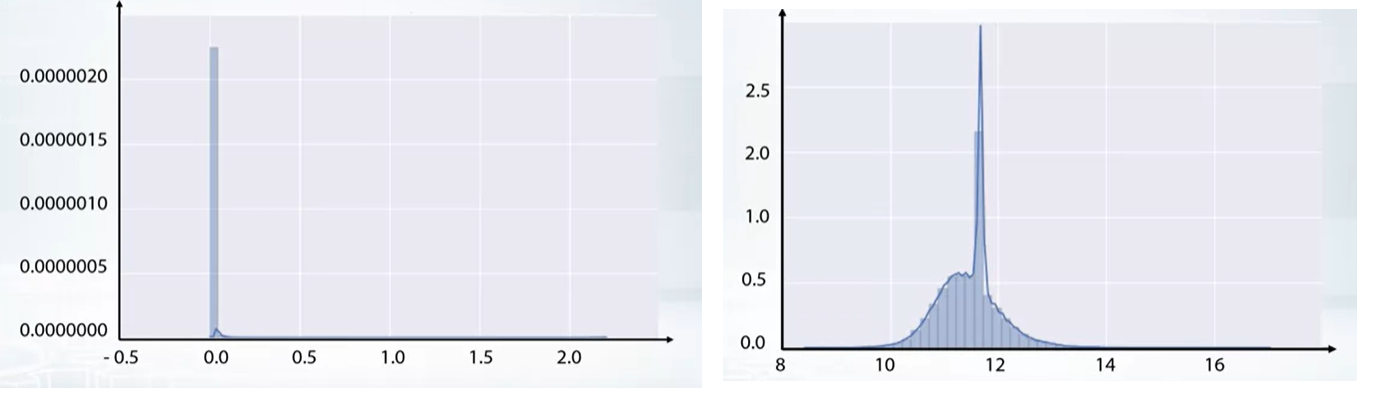

In [3]:
Image.open('img3.png')

2. Plots
    - 그림 1
        - 가로 선이 보이면, 중복된 값이 매우 많은 것
        - 가로 선은 보이는데, 세로 선은 안보인다 => 데이터가 적절히 shuffled 되었다.
    
    - 그림 2
        - class label 별로 scatter한건데, 데이터가 전혀 안섞여 있음을 보여줌.

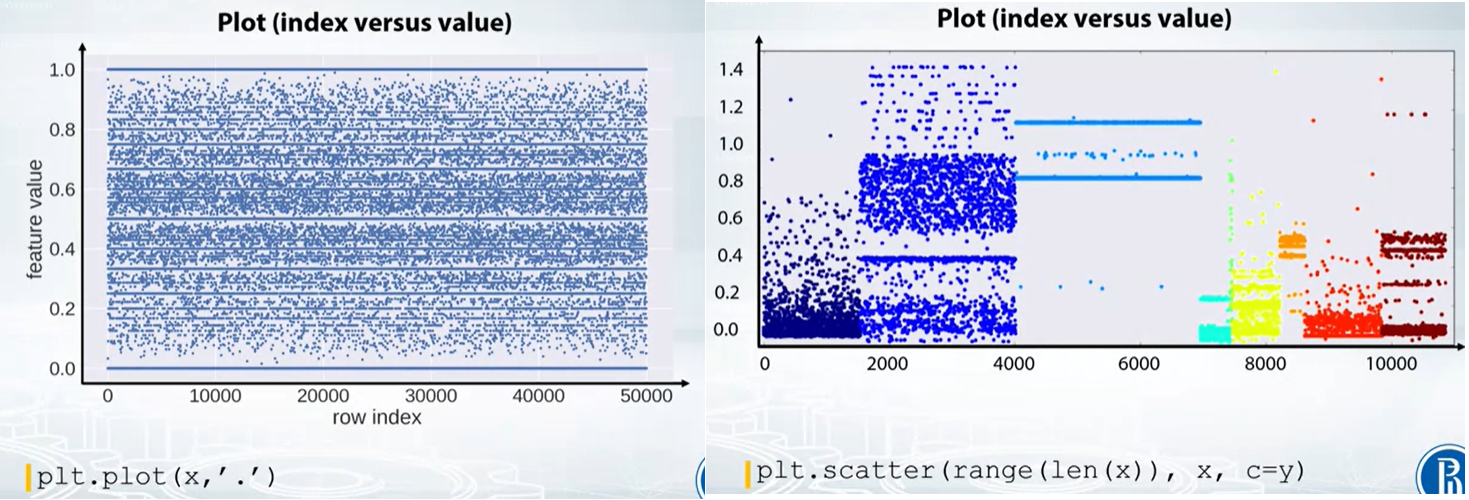

In [4]:
Image.open('img4.png')

3. 각종 통계량
> df.describe(), x.mean(), x.var() 대략 이런 통계량들

4. 다른 tool
- value_counts()
- null 시각화

### Explore feature relations

1. Scatter plots
    - 그림1
        - classification task일 때는 색깔로 label를 구분하여서 시각화
        - regression task일 때는 heatmap으로 or 포인트 사이즈로 구분 
    - 그림2
        - train과 test set의 분포가 같은지 다른지를 확인할 때 유용하다.
        - 보면 test가 class0과는 분포가 겹쳐 있지만, 다른 구역에 분포 되어 있다. 
        
        => 내 코드가 이상하거나, 완전 overfitted feature거나
        
    - 그림3
        - X1과 X2의 관계는 X1+X2 = 1이다. 이걸 가지고 feature generation 할 수 있겟지. 
        
        (e.g.) X1-X2 , X1/X2 이런거
        
    - 그림4 
        - 우리의 목적은 data를 해독하는게 아니라, feature를 만들어 내는 것이다! 기억할 것.
        - 여기서 feature를 만들어 낼 수 있는 것. 여러개의 삼각형이 보이지? 각 삼각형에 포함되는 여부로 feature 생성 가능
        
pd.scatter_matrix(df) 함수로 쫙 볼 수 있음

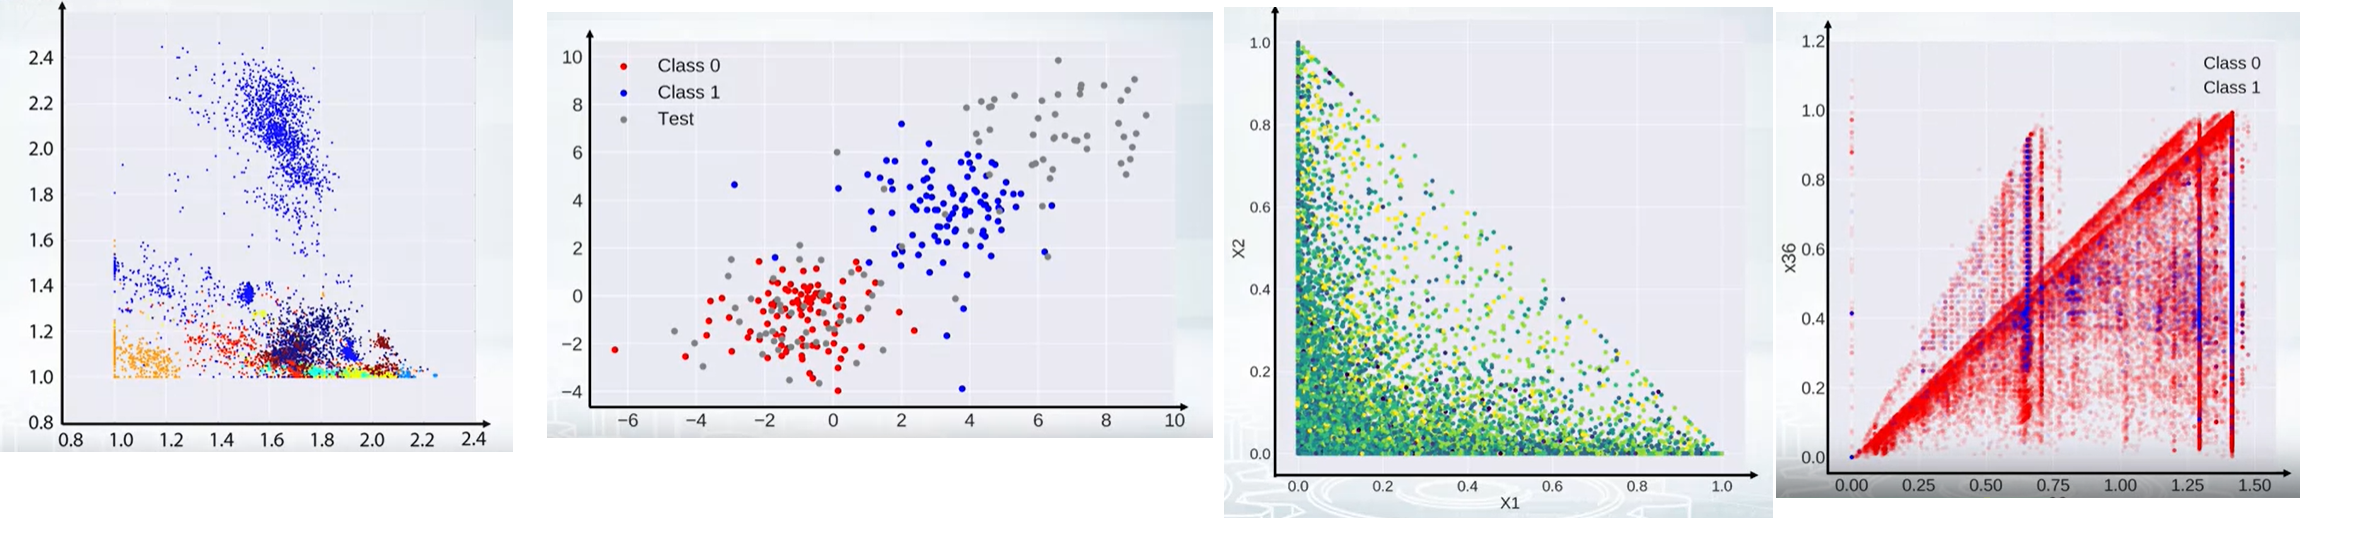

In [5]:
Image.open('img5.png')

2. 각 feature간의 distance를 구하기
    - 그림1 
        - Correlation, X1이 X2보다 값이 큰 횟수, distinct combination 개수 등 다양한 metric 생성 가능
        - 그림 보면 매우 mess함 => kmeans로 clustering해서 reorder할 수 있음 => 그림2

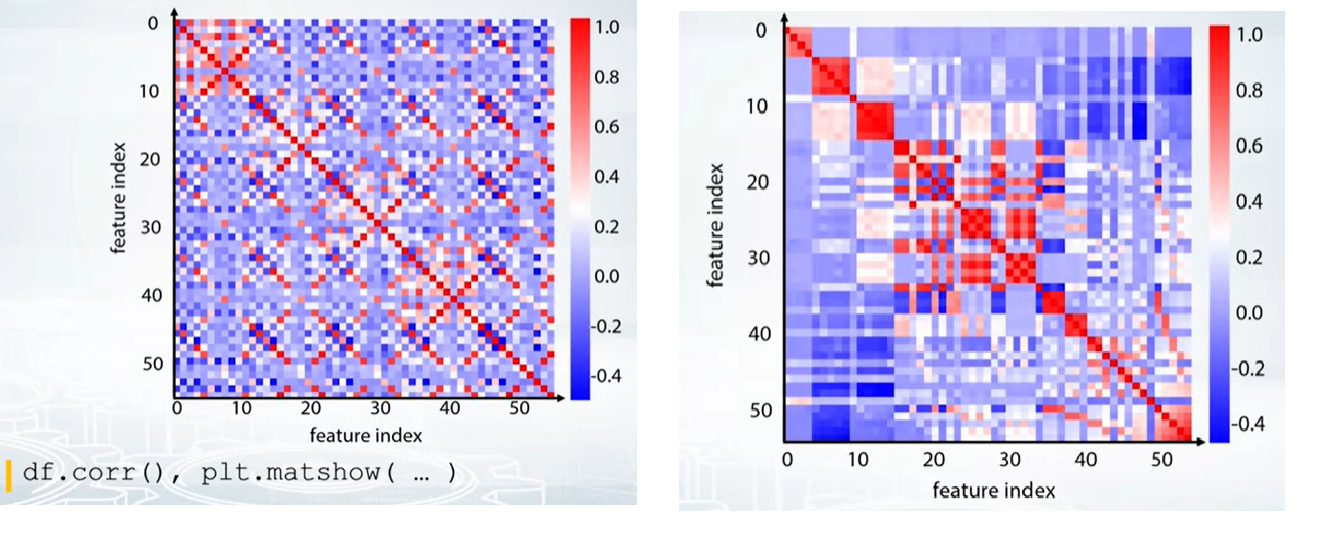

In [6]:
Image.open('img6.png')

3. Feature group 만들기
    비슷한 feature들로 group을 짓고, 이런 group은 feature generation에 유용함. 그룹별로 계산된 통계량이 좋은 feature가 될 것임.
    - 그림1
        - feature group 찾기 도와주는 그림
        - feature들을 어떤 통계량으로(예로 mean) plot하면 이렇게 랜덤으로 막 나오는데 이걸 sort하면 그림2
    -그림2
        - 확실하게 group이 보인다.
        - group을 자세히 살펴보고 feature 만들자

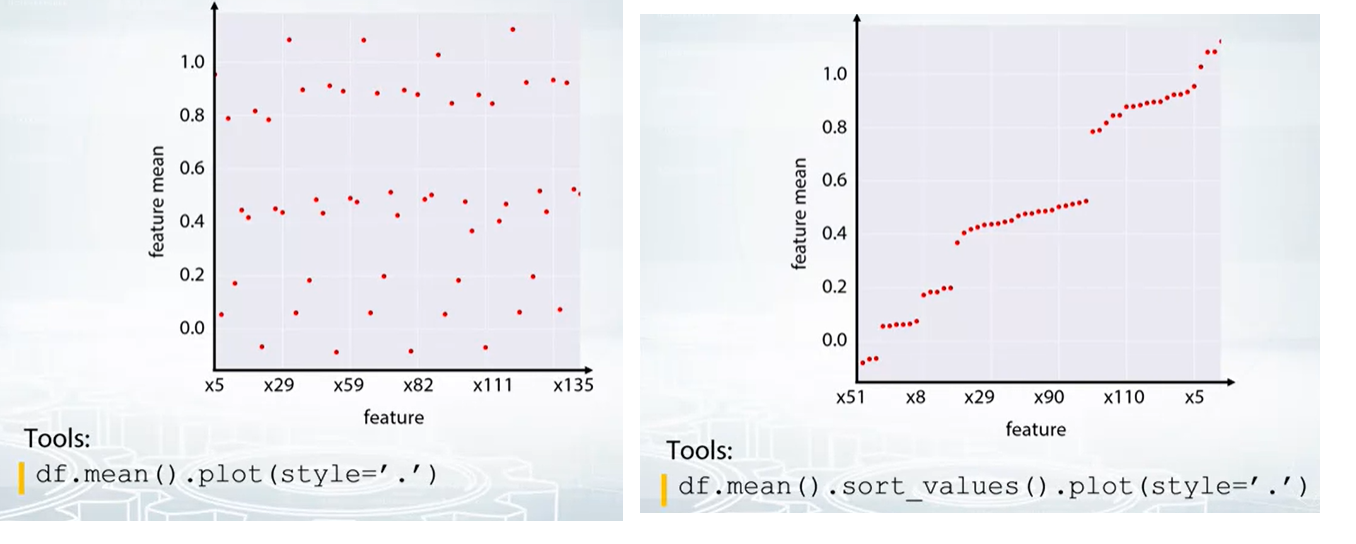

In [7]:
Image.open('img7.png')